<a href="https://colab.research.google.com/github/veruizr/micropython/blob/main/fourbar_Newton_raphson_micropython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Código en micropytho para resolver la posición de un mecanismo de cuatro barras mediante Newton Raphson

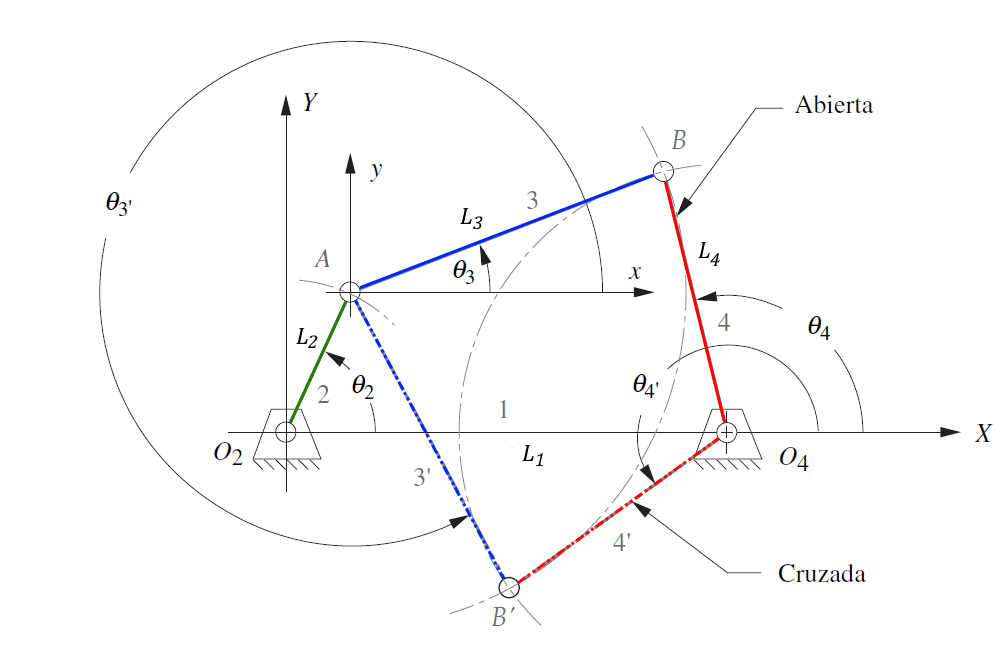

Norton(2009)

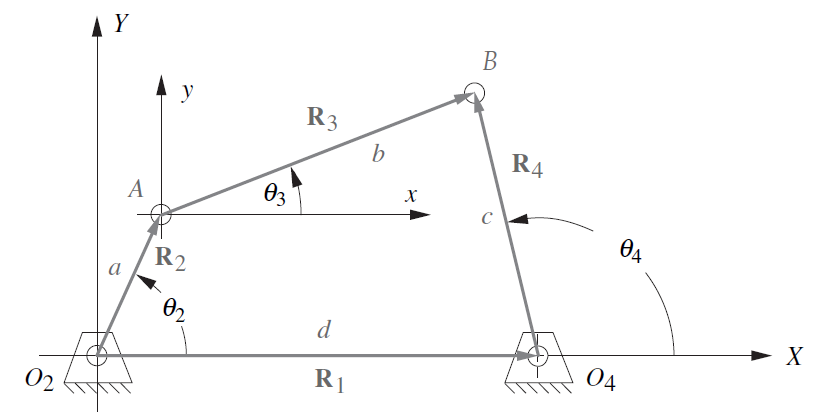

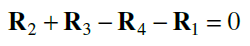

 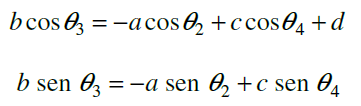





In [ ]:
import math

##Programa micropython para calcular la posición de mecanismos de cuatro barras
# usando el método de Newton- Raphson

#cálculo de condición de Grashoff y tipo de mecanismo de acuerdo con clasificación de Barker
def id_grashof(L1, L2, L3, L4):

    longitudes = sorted([L1, L2, L3, L4])#organizar longitudes de menor a mayor
    s,p,q,l = longitudes #s=eslabón más corto,l=eslabón más largo, p y q longitudes intermedias
    suma_extremos = s + l
    suma_intermedias = p + q

    if suma_extremos < suma_intermedias:
            # Determinar qué eslabón es el más corto
            eslabones = [(L1, "fijo"), (L2, "entrada"),
                        (L3, "acoplador"), (L4, "salida")]
            min_eslabon = min(eslabones, key=lambda x: x[0])

            if min_eslabon[1] == "entrada":
                return "Grashof, manivela-balancín"
            elif min_eslabon[1] == "fijo":
                return "Grashof, doble manivela"
            elif min_eslabon[1] == "acoplador":
                return "Grashof, doble balancín"
            else:
                return "manivela-balancín"

    elif suma_extremos == suma_intermedias:
        return "NO Grashof, mecanismo plegable"
    else:
        return "NO Grashof, triple balancín"


#Función para calcular posición mediante Newton Raphson

def four_bar_analysis(L1, L2, L3, L4, theta2, max_iter=100, tol=1e-6):
    """
    Calcula los ángulos de los eslabones acoplador y de salida.
    Retorna: (theta3, theta4, near_singular, grashof)
    """
    # Verificar condición de Grashof
    grashof = id_grashof(L1, L2, L3, L4)

    # Estimación inicial para theta4 usando una ecuación de distancia entre
    #el apoyo fijo izquierdo y el punto de unión acoplador-salida

    theta4 = theta2  # Valor inicial
    for _ in range(50):
        dx = L1 - L4*math.cos(theta4) - L2*math.cos(theta2)
        dy = L4*math.sin(theta4) - L2*math.sin(theta2)
        error = dx**2 + dy**2 - L3**2
        if abs(error) < 1e-3:
            break
        df = 2*dx*(-L4*math.sin(theta4)) + 2*dy*(L4*math.cos(theta4))
        if df == 0:
            break
        theta4 -= error/df

    # 3. Estimación inicial para theta3
    sin_theta3 = (L4*math.sin(theta4) - L2*math.sin(theta2))/L3
    cos_theta3 = (L1 - L4*math.cos(theta4) - L2*math.cos(theta2))/L3
    theta3 = math.atan2(sin_theta3, cos_theta3)

    # 4. Método de Newton-Raphson para solución del sistema de ecuaciones de posición con detección de singularidades
    near_singular = False
    for _ in range(max_iter):
        # # Ecuación de lazo: r2 + r3 = r1 + r4 se asume theta1=0
        # Componente X: L2*cos(θ2) + L3*cos(θ3) = L1*cos(0) + L4*cos(θ4)
        # Componente Y: L2*sin(θ2) + L3*sin(θ3) = L1*sin(0) + L4*sin(θ4)
        lx = L2*math.cos(theta2) + L3*math.cos(theta3) - L4*math.cos(theta4) - L1
        ly = L2*math.sin(theta2) + L3*math.sin(theta3) - L4*math.sin(theta4)

        if abs(lx) < tol and abs(ly) < tol:
            break

        # Calcular Jacobiano del sistema de ecuaciones
        # Derivadas parciales de f respecto a theta3 y theta4
        J11 = -L3*math.sin(theta3)
        J12 = L4*math.sin(theta4)
        # Derivadas parciales de g respecto a theta3 y theta4
        J21 = L3*math.cos(theta3)
        J22 = -L4*math.cos(theta4)
        #determinante del Jacobiano
        det = J11*J22 - J12*J21

        # Verificar singularidad
        if abs(det) < 1e-3:
            near_singular = True

        if det == 0:
            return None, None, True, grashof # Matriz singular

        # Calcular incrementos
        delta3 = (-lx*J22 + ly*J12)/det
        delta4 = (lx*J21 - ly*J11)/det

        theta3 += delta3
        theta4 += delta4
    else:
        return None, None, near_singular, grashof

    # Verificación final de singularidad
    J11 = -L3*math.sin(theta3)
    J12 = L4*math.sin(theta4)
    J22 = -L4*math.cos(theta4)
    det = J11*J22 - (L4*math.sin(theta4))*(L3*math.cos(theta3))
    if abs(det) < 1e-6:
        near_singular = True

    return theta3, theta4, near_singular, grashof

# Ejemplo de uso
if __name__ == "__main__":
    # Longitudes de los eslabones
    L1 = 120  # Eslabón fijo
    L2 = 40  # Eslabón de entrada
    L3 = 90  # Eslabón acoplador
    L4 = 80  # Eslabón de salida

    # Ángulo de entrada en radianes
    theta2 = math.radians(12)

    # Realizar cálculo
    theta3, theta4, singular, grashof = four_bar_analysis(L1, L2, L3, L4, theta2)
    theta3_grad=math.degrees(theta3)
import math

def is_grashof(L1, L2, L3, L4):
    """
    Verifica la condición de Grashof.
    Retorna True si el mecanismo es Grashof.
    """
    longitudes = sorted([L1, L2, L3, L4])#organizar longitudes de menor a mayor
    s,p,q,l = longitudes #s=eslabón más corto,l=eslabón más largo, p y q longitudes intermedias
    suma_extremos = s + l
    suma_intermedias = p + q

    if suma_extremos < suma_intermedias:
            # Determinar qué eslabón es el más corto
            eslabones = [(L1, "fijo"), (L2, "entrada"),
                        (L3, "acoplador"), (L4, "salida")]
            min_eslabon = min(eslabones, key=lambda x: x[0])

            if min_eslabon[1] == "entrada":
                return "Grashof, manivela-balancín"
            elif min_eslabon[1] == "fijo":
                return "Grashof, doble manivela"
            elif min_eslabon[1] == "acoplador":
                return "Grashof, doble balancín"
            else:
                return "manivela-balancín"

    elif suma_extremos == suma_intermedias:
        return "NO Grashof, mecanismo plegable"
    else:
        return "NO Grashof, triple balancín"

    #return suma_extremos <= suma_intermedias



def four_bar_analysis(L1, L2, L3, L4, theta2, max_iter=100, tol=1e-6):
    """
    Calcula los ángulos de los eslabones acoplador y de salida.
    Retorna: (theta3, theta4, near_singular, grashof)
    """
    # 1. Verificar condición de Grashof
    grashof = is_grashof(L1, L2, L3, L4)

    # 2. Estimación inicial para theta4 usando una ecuación de distancia
    theta4 = theta2  # Valor inicial
    for _ in range(50):
        dx = L1 + L4*math.cos(theta4) - L2*math.cos(theta2)
        dy = L4*math.sin(theta4) - L2*math.sin(theta2)
        error = dx**2 + dy**2 - L3**2
        if abs(error) < 1e-3:
            break
        df = 2*dx*(-L4*math.sin(theta4)) + 2*dy*(L4*math.cos(theta4))
        if df == 0:
            break
        theta4 -= error/df

    # 3. Estimación inicial para theta3
    sin_theta3 = (L4*math.sin(theta4) - L2*math.sin(theta2))/L3
    cos_theta3 = (L1 + L4*math.cos(theta4) - L2*math.cos(theta2))/L3
    theta3 = math.atan2(sin_theta3, cos_theta3)

    # 4. Newton-Raphson para sistema completo
    near_singular = False
    for _ in range(max_iter):
        # # Ecuación de lazo: r2 + r3 = r1 + r4 se asume theta1=0
        # Componente X: L2*cos(θ2) + L3*cos(θ3) = L1*cos(0) + L4*cos(θ4)
        # Componente Y: L2*sin(θ2) + L3*sin(θ3) = L1*sin(0) + L4*sin(θ4)
        f = L2*math.cos(theta2) + L3*math.cos(theta3) - L4*math.cos(theta4) - L1
        g = L2*math.sin(theta2) + L3*math.sin(theta3) - L4*math.sin(theta4)

        if abs(f) < tol and abs(g) < tol:
            break

        # Calcular Jacobiano del sistema de ecuaciones
        # Derivadas parciales de f respecto a theta3 y theta4
        J11 = -L3*math.sin(theta3)
        J12 = L4*math.sin(theta4)
        # Derivadas parciales de g respecto a theta3 y theta4
        J21 = L3*math.cos(theta3)
        J22 = -L4*math.cos(theta4)
        #determinante del Jacobiano
        det = J11*J22 - J12*J21

        # Verificar singularidad
        if abs(det) < 1e-3:
            near_singular = True

        if det == 0:
            return None, None, True, grashof # Matriz singular

        # Calcular incrementos
        delta3 = (-f*J22 + g*J12)/det
        delta4 = (f*J21 - g*J11)/det

        theta3 += delta3
        theta4 += delta4
    else:
        return None, None, near_singular, grashof

    # Verificación final de singularidad
    J11 = -L3*math.sin(theta3)
    J12 = L4*math.sin(theta4)
    J22 = -L4*math.cos(theta4)
    det = J11*J22 - (L4*math.sin(theta4))*(L3*math.cos(theta3))
    if abs(det) < 1e-6:
        near_singular = True

    return theta3, theta4, near_singular, grashof

# Ejemplo de uso
if __name__ == "__main__":
    # Longitudes de los eslabones
    L1 = 120  # Eslabón fijo
    L2 = 40  # Eslabón de entrada
    L3 = 90  # Eslabón acoplador
    L4 = 80  # Eslabón de salida
    theta2_grados=60

    # Ángulo de entrada en radianes
    theta2 = math.radians(theta2_grados)

    # Realizar cálculo
    theta3, theta4, near_singular, grashof = four_bar_analysis(L1, L2, L3, L4, theta2)
    theta3_grad=math.degrees(theta3)
    theta4_grad=math.degrees(theta4)

    if theta3 is not None and theta3 < 0:
        configuracion='Cruzada'
    else:
        configuracion='Abierta'

    # Mostrar resultados
    print(f"Condición de Grashof: {grashof}")
    if theta3 is not None:
        print(f"Ángulos calculados rads/ (°):")
        print(f"Theta3 (acoplador): {theta3_grad:.4f}° ({theta3:.4f}rads)")
        print(f"Theta4 (salida):   {theta4_grad:.4f}° ({theta4:.4f} rads)")
        print(f"Configuración: {configuracion}")
        print(f"Cerca de singularidad: {singular}")

    else:
        print("Error: No se pudo encontrar solución")



Condición de Grashof: Grashof, manivela-balancín
Ángulos calculados rads/ (°):
Theta3 (acoplador): 28.2692° (0.4934rads)
Theta4 (salida):   105.0212° (1.8330 rads)
Configuración: Abierta
Cerca de singularidad: False
